<b>Nome:</b> João Henrique Silva Delfino 

<b>Matrícula:</b> 1662

## Segmentation using channel color

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [57]:
def histogram(img):
    l, c = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram
    
def show_histogram(img, img_gray):
    histogram_gray = histogram(img_gray)
    histogram_r = histogram(img[:, :, 0])
    histogram_g = histogram(img[:, :, 1])
    histogram_b = histogram(img[:, :, 2])
    
    plt.figure(figsize=(12,12))
    plt.subplot(2, 2, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 2, 2)
    plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 2, 3)
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')
    plt.bar(range(256), histogram_r, color='red')
    plt.subplot(2, 2, 4)
    plt.bar(range(256), histogram_gray)
    
def gray_image(image):
    return((0.2126 * image[:, :, 0]) + (0.7152 * image[:, :, 1]) + (0.0722 * image[:, :, 2])).astype(np.uint8)

In [58]:
# Opening image and converting to ndarray
image = np.array(Image.open('thermometer.jpg'))
# Dimensions
(l, c, p) = image.shape

<b> Analisando o Histograma da imagem </b>

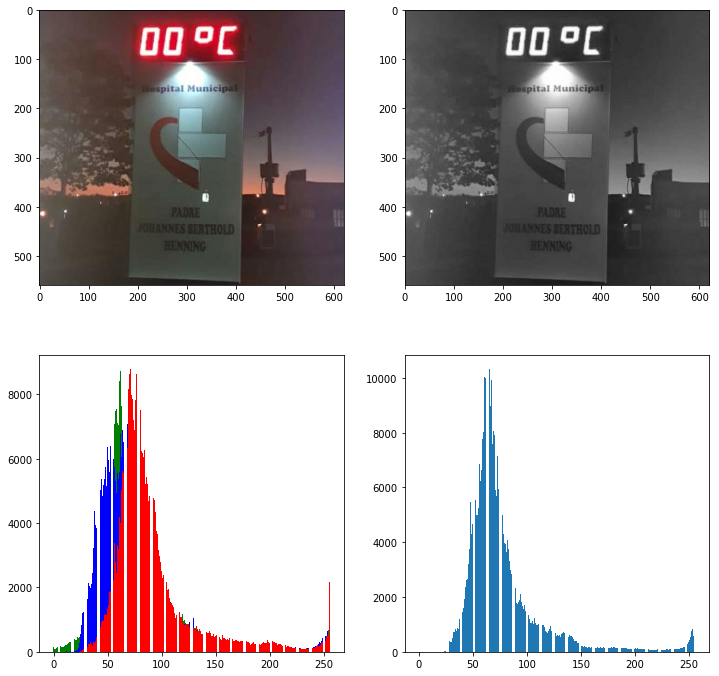

In [59]:
# Converting to grayscale
image_gray = gray_image(image)

# Showing both histograms
show_histogram(image, image_gray)

<b> Showing histogram of thermometer and a part of the image</b>

In [60]:
# Defining to spaces: With temperature and without temperature
image_without_temperature = image[100:300, 300:500]
image_temperature = image[0:100, 200:400]

image_without_temp_gray = gray_image(image_without_temperature)
image_temperature_gray = gray_image(image_temperature)

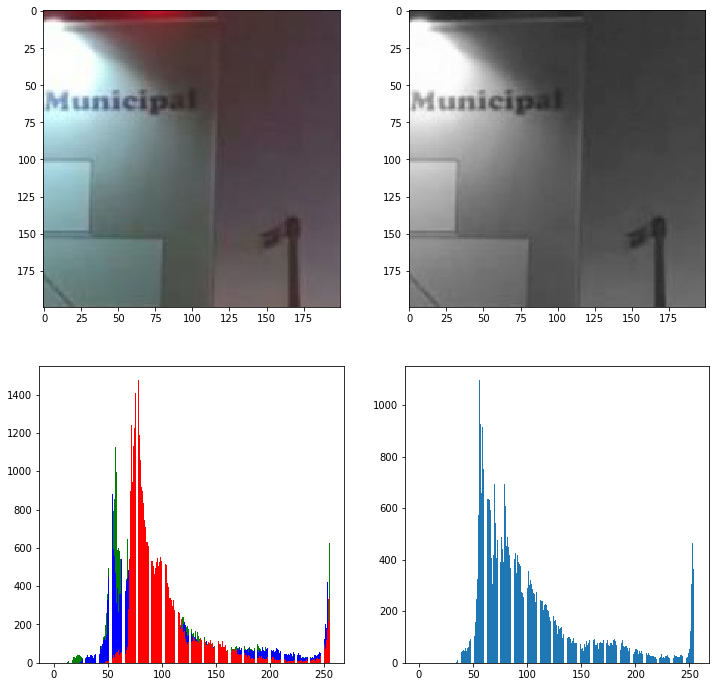

In [61]:
show_histogram(image_without_temperature, image_without_temp_gray)

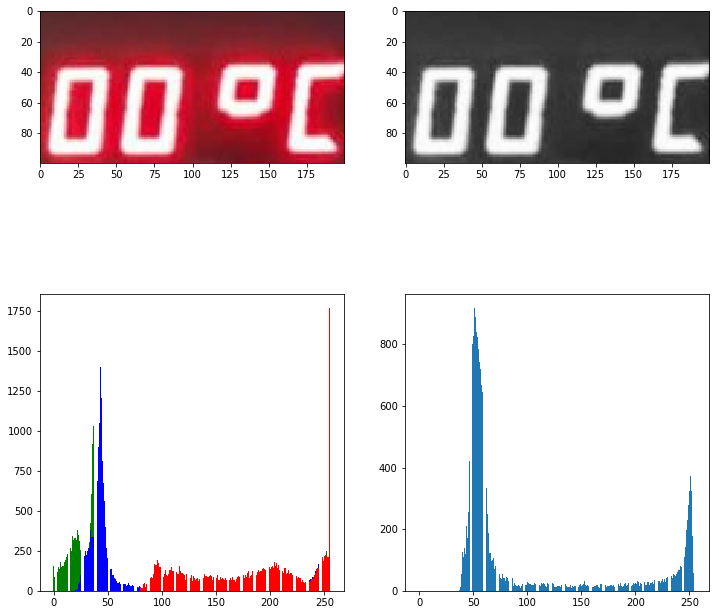

In [62]:
show_histogram(image_temperature, image_temperature_gray)

### Red channel is more present than other in the image with thermometer

Therefore, this channel will be used for threshold. Using threshold of 250.

The white light below the part that is being observed may have the red channel above the threshold. This part probably also has the G and B channels above the threshold, so we will need to deal with this light.

In [63]:
def red_threshold(image, threshold):
    
    l, c, p = image.shape
    red_bin = np.zeros(shape=(l, c), dtype=np.uint8)
    
    for i in range (l):
        for j in range (c):
            
            value_r = image[i,j,0]
            value_g = image[i,j,1]
            value_b = image[i,j,2]
            
            if value_r >= threshold and value_g < threshold and value_b < threshold:
                # Set to white
                red_bin[i,j] = 1
            else:
                # Set to black where there isn't red enough or green value is high or b value is high
                red_bin[i,j] = 0
                
    return red_bin
            

In [64]:
# Defining threshold
threshold = 250
# Applying red threshold
bin_image = red_threshold(image, threshold)
not_bin = np.invert(bin_image)

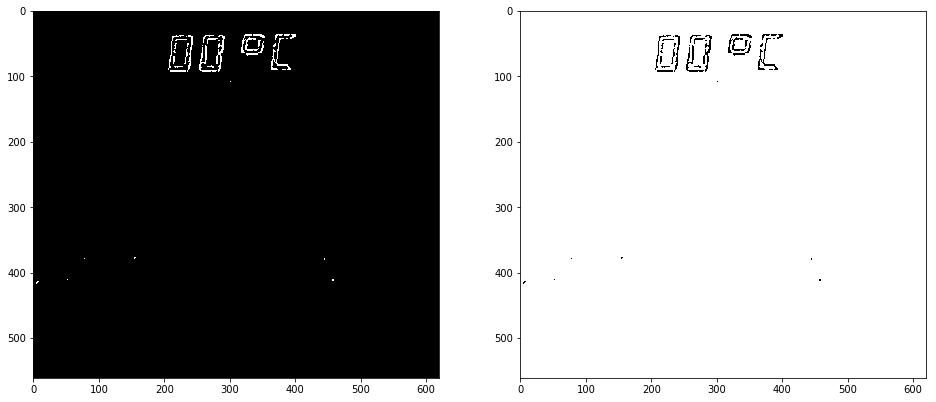

In [65]:
plt.figure(figsize=(16,16))
plt.subplot(1, 2, 1)
plt.imshow(bin_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(not_bin, cmap='gray')